<h1>Import bibliotek</h1>

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kstest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<p style="font-size: 20px;"> Baza danych zawiera informację o osobach pod kątem cukrzycy. Kolejne kolumny zawierają następujące informację:</p>
<ul>
    <li>Pregnancies	- ilość ciąży</li>
    <li>Glucose - stężenie glukozy w osoczu</li>
    <li>BloodPressure - ciśnienie krwi(mmHg)</li>
    <li>SkinThickness - grubość skóry(mm)</li>
    <li>Insulin	- insulina(mU/ml)</li>
    <li>BMI - indeks masy ciała</li>
    <li>DiabetesPedigreeFunction - funkcja oceniająca prawdopodobieństwo cukrzycy na podstawie historii rodziny</li>
    <li>Age - wiek</li>
    <li>Outcome - wartości 1(chory na cukrzycę) lub 0(zdrowy)</li>
</ul>

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h1>Usunięcie wierszy, w których wartości wynoszą 0(poza takimi gdzie wartość 0 nie oznacza braku informacji).</h1>

In [5]:
df = df[(df['Glucose'] != 0) & (df['BloodPressure'] != 0) & (df['SkinThickness'] != 0) & (df['Insulin'] != 0) & (df['BMI'] != 0)]

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
def normality_plots(data):
    for i in range(data.shape[1] - 1):
        column_name = data.columns[i]
        plt.hist(data[column_name], bins=30, color='lightgreen', edgecolor='black')
        plt.title(f'Histogram - {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

<h1>Sprawdzenie normalności zmiennych - histogramy</h1>

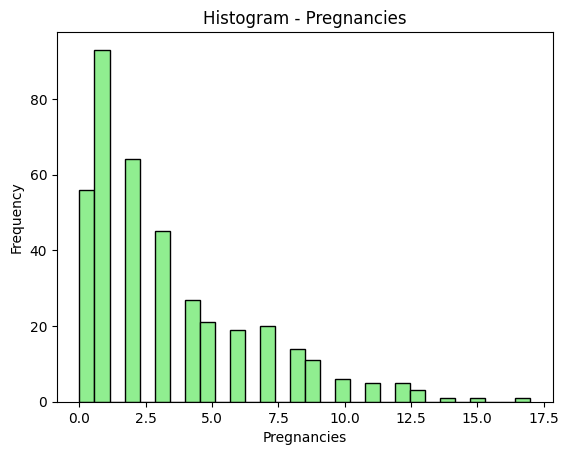

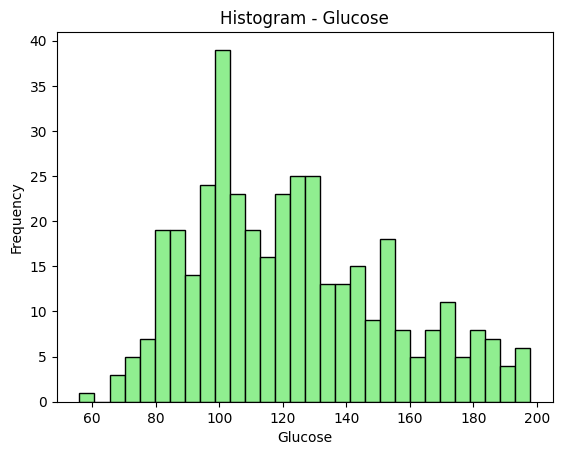

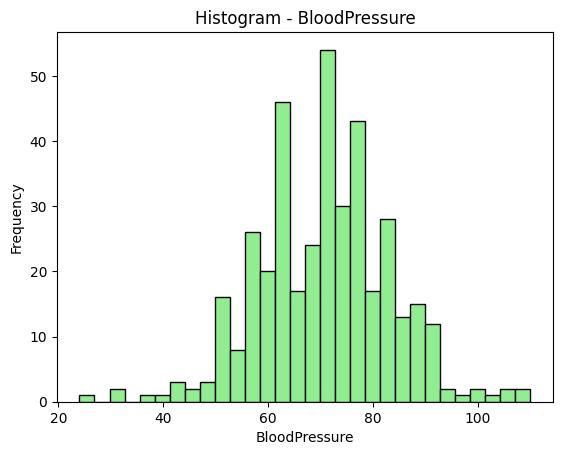

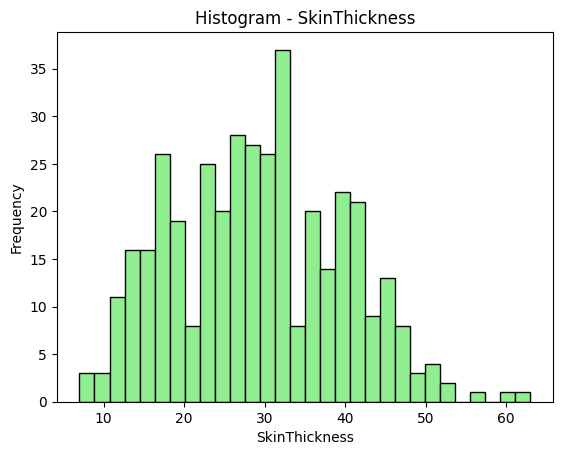

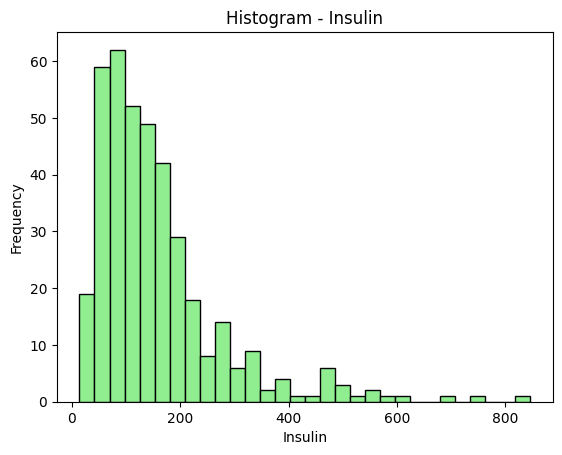

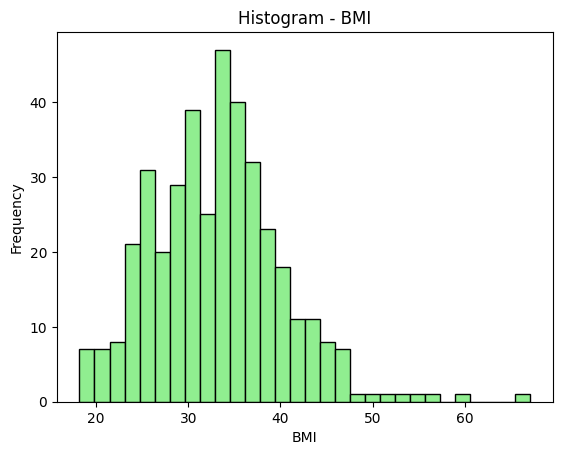

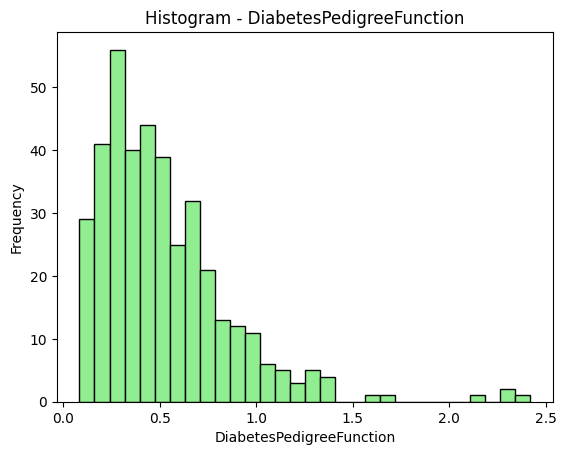

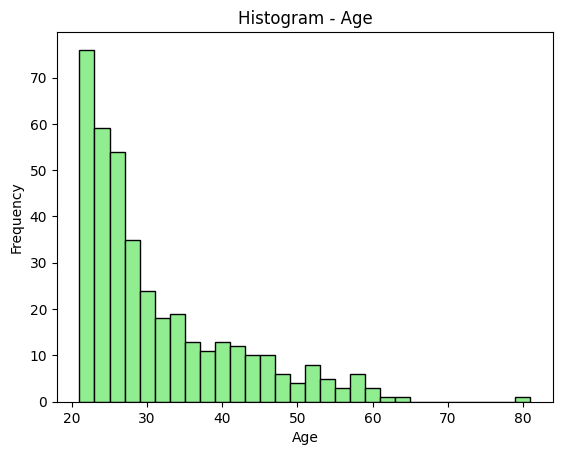

In [9]:
normality_plots(df)

<h1>Sprawdzenie normalnośći zmiennych - test Kołmogorowa-Smirnowa</h1>

In [10]:
def kolmogorov_smirnov_test(df):
    for i in range(df.shape[1] - 1):
        data = df.iloc[:, i]
        standardized_data = (data - data.mean()) / data.std()
        stat, p_value = kstest(standardized_data, 'norm')
        print(f"Test Kołmogorowa-Smirnowa dla kolumny {df.columns[i]}")
        print(f"Statystyka = {stat:.3f}")
        print(f"P-wartość = {p_value:.3f}")

In [11]:
kolmogorov_smirnov_test(df)

Test Kołmogorowa-Smirnowa dla kolumny Pregnancies
Statystyka = 0.201
P-wartość = 0.000
Test Kołmogorowa-Smirnowa dla kolumny Glucose
Statystyka = 0.081
P-wartość = 0.011
Test Kołmogorowa-Smirnowa dla kolumny BloodPressure
Statystyka = 0.045
P-wartość = 0.389
Test Kołmogorowa-Smirnowa dla kolumny SkinThickness
Statystyka = 0.055
P-wartość = 0.186
Test Kołmogorowa-Smirnowa dla kolumny Insulin
Statystyka = 0.145
P-wartość = 0.000
Test Kołmogorowa-Smirnowa dla kolumny BMI
Statystyka = 0.039
P-wartość = 0.573
Test Kołmogorowa-Smirnowa dla kolumny DiabetesPedigreeFunction
Statystyka = 0.106
P-wartość = 0.000
Test Kołmogorowa-Smirnowa dla kolumny Age
Statystyka = 0.182
P-wartość = 0.000


<p style="font-size:20px;">Na podstawie histogramów oraz testu Kołmogorowa-Smirnowa możemy stwierdzić, że wartości w następujących kolumnach mają rozkład normalny:</p>
    <ul>
        <li style="font-size:18px";>BloodPressure</li>
        <li style="font-size:18px";>SkinThickness</li>
        <li style="font-size:18px";>BMI</li>
    </ul>
<p style="font-size:20px;">Dlatego dla powyższych 3 kolumn wykonamy test t-Studenta, a dla pozostałych test U Manna–Whitneya. Będziemy w tych testach sprawdzać jak różni się średnia danej wartości pomiędzy osobami chorymi na cukrzycę oraz zdrowymi.</p>

<h1>Dzielimy dane na 2 grupy: osoby mające cukrzycę i osoby bez cukrzycy</h1>

In [12]:
diabetes = df[df.Outcome == 1]
no_diabetes = df[df.Outcome == 0]

<h1>Testy t-Studenta</h1>

<h2>Test Levene'a i test t-Studenta dla kolumny <strong><em>BloodPressure</em></strong> </h2>

In [13]:
diabetes_bloodpressure = diabetes['BloodPressure']
no_diabetes_bloodpressure = no_diabetes['BloodPressure']

In [14]:
stat, p = levene(diabetes_bloodpressure, no_diabetes_bloodpressure)
print("Test Levene'a:")
print(f"Statystyka = {stat:.2f}")
print(f"P-wartość = {p:.2f}")

Test Levene'a:
Statystyka = 0.58
P-wartość = 0.45


In [15]:
t_stat, p_value = ttest_ind(diabetes_bloodpressure, no_diabetes_bloodpressure)
mean1 = np.mean(diabetes_bloodpressure)
mean2 = np.mean(no_diabetes_bloodpressure)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.5f}")
print(f"P-wartość: {p_value:.5f}")
print(f"Średnia wartość ciśnienia u osób chorych na cukrzycę: {mean1:.2f}")
print(f"Średnia wartość ciśnienia u osób zdrowych: {mean2:.2f}")

Test t-Studenta:
Statystyka t: 3.87765
P-wartość: 0.00012
Średnia wartość ciśnienia u osób chorych na cukrzycę: 74.08
Średnia wartość ciśnienia u osób zdrowych: 68.97


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest większa niż 0,05, więc wariancje dla zmiennej <strong><em>BloodPressure</em></strong> są podobne. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h2>Test Levene'a i test t-Studenta dla kolumny <strong><em>SkinThickness</em></strong> </h2>

In [16]:
diabetes_skinthickness = diabetes['SkinThickness']
no_diabetes_skinthickness = no_diabetes['SkinThickness']

In [17]:
stat, p = levene(diabetes_skinthickness, no_diabetes_skinthickness)
print("Test Levene'a:")
print(f"Statystyka = {stat:.2f}")
print(f"P-wartość = {p:.2f}")

Test Levene'a:
Statystyka = 2.12
P-wartość = 0.15


In [18]:
t_stat, p_value = ttest_ind(diabetes_skinthickness, no_diabetes_skinthickness)
mean1 = np.mean(diabetes_skinthickness)
mean2 = np.mean(no_diabetes_skinthickness)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.7f}")
print(f"P-wartość: {p_value:.7f}")
print(f"Średnia wartość grubości skóry u osób chorych na cukrzycę: {mean1:.2f}")
print(f"Średnia wartość grubości skóry u osób zdrowych: {mean2:.2f}")

Test t-Studenta:
Statystyka t: 5.2284645
P-wartość: 0.0000003
Średnia wartość grubości skóry u osób chorych na cukrzycę: 32.96
Średnia wartość grubości skóry u osób zdrowych: 27.25


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest większa niż 0,05, więc wariancje dla zmiennej <strong><em>SkinThickness</em></strong> są podobne. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h2>Test Levene'a i test t-Studenta dla kolumny <strong><em>BMI</em></strong> </h2>

In [19]:
diabetes_bmi = diabetes['BMI']
no_diabetes_bmi = no_diabetes['BMI']

In [20]:
stat, p = levene(diabetes_bmi, no_diabetes_bmi)
print("Test Levene'a:")
print(f"Statystyka = {stat:.2f}")
print(f"P-wartość = {p:.2f}")

Test Levene'a:
Statystyka = 2.53
P-wartość = 0.11


In [21]:
t_stat, p_value = ttest_ind(diabetes_bmi, no_diabetes_bmi)
mean1 = np.mean(diabetes_bmi)
mean2 = np.mean(no_diabetes_bmi)

print("Test t-Studenta:")
print(f"Statystyka t: {t_stat:.8f}")
print(f"P-wartość: {p_value:.8f}")
print(f"Średnia wartość BMI osób chorych na cukrzycę: {mean1:.2f}")
print(f"Średnia wartość BMI osób zdrowych: {mean2:.2f}")

Test t-Studenta:
Statystyka t: 5.54036245
P-wartość: 0.00000006
Średnia wartość BMI osób chorych na cukrzycę: 35.78
Średnia wartość BMI osób zdrowych: 31.75


<p style="font-size:20px;">
Widzimy, że wartość p w teście Levene'a jest większa niż 0,05, więc wariancje dla zmiennej <strong><em>BMI</em></strong> są podobne. Wartość p w teście t-Studenta jest mniejsza niż 0,05, więc różnica między średnimi jest istotna statystycznie.
</p>

<h1>Testy U Manna–Whitneya</h1>

<h2>Test U Manna-Whitneya dla kolumny <strong><em>Pregnancies</em></strong></h2>

In [22]:
diabetes_pregnancies = diabetes['Pregnancies']
no_diabetes_pregnancies = no_diabetes['Pregnancies']

In [23]:
u_stat, p_value = mannwhitneyu(diabetes_pregnancies, no_diabetes_pregnancies)
median1 = np.median(diabetes_pregnancies)
median2 = np.median(no_diabetes_pregnancies)

print("Test Manna-Whitneya:")
print(f"Statystyka U: {u_stat:.8f}")
print(f"P-wartość: {p_value:.8f}")
print(f"Mediana ilości ciąży u osób chorych na cukrzycę: {median1:.2f}")
print(f"Mediana ilości ciąży u osób zdrowych: {median2:.2f}")

Test Manna-Whitneya:
Statystyka U: 21163.50000000
P-wartość: 0.00007530
Mediana ilości ciąży u osób chorych na cukrzycę: 3.00
Mediana ilości ciąży u osób zdrowych: 2.00


<p style="font-size:20px;">
Widzimy, że wartość p w teście U Manna–Whitneya jest mniejsza niż 0,05, więc różnica między danymi jest istotna statystycznie.
</p>

<h2>Test U Manna-Whitneya dla kolumny <strong><em>Glucose</em></strong></h2>

In [24]:
diabetes_glucose = diabetes['Glucose']
no_diabetes_glucose = no_diabetes['Glucose']

In [25]:
u_stat, p_value = mannwhitneyu(diabetes_glucose, no_diabetes_glucose)
median1 = np.median(diabetes_glucose)
median2 = np.median(no_diabetes_glucose)

print("Test Manna-Whitneya:")
print(f"Statystyka U: {u_stat:.8f}")
print(f"P-wartość: {p_value:.8f}")
print(f"Mediana wartości glukozy u osób chorych na cukrzycę: {median1:.2f}")
print(f"Mediana wartości glukozy u osób zdrowych: {median2:.2f}")

Test Manna-Whitneya:
Statystyka U: 27444.50000000
P-wartość: 0.00000000
Mediana wartości glukozy u osób chorych na cukrzycę: 144.50
Mediana wartości glukozy u osób zdrowych: 107.50


<p style="font-size:20px;">
Widzimy, że wartość p w teście U Manna–Whitneya jest mniejsza niż 0,05, więc różnica między danymi jest istotna statystycznie.
</p>

<h2>Test U Manna-Whitneya dla kolumny <strong><em>Insulin</em></strong></h2>

In [26]:
diabetes_insulin = diabetes['Insulin']
no_diabetes_insulin = no_diabetes['Insulin']

In [27]:
u_stat, p_value = mannwhitneyu(diabetes_insulin, no_diabetes_insulin)
median1 = np.median(diabetes_insulin)
median2 = np.median(no_diabetes_insulin)

print("Test Manna-Whitneya:")
print(f"Statystyka U: {u_stat:.8f}")
print(f"P-wartość: {p_value:.8f}")
print(f"Mediana wartości insuliny u osób chorych na cukrzycę: {median1:.2f}")
print(f"Mediana wartości insuliny u osób zdrowych: {median2:.2f}")

Test Manna-Whitneya:
Statystyka U: 24861.50000000
P-wartość: 0.00000000
Mediana wartości insuliny u osób chorych na cukrzycę: 169.50
Mediana wartości insuliny u osób zdrowych: 105.00


<p style="font-size:20px;">
Widzimy, że wartość p w teście U Manna–Whitneya jest mniejsza niż 0,05, więc różnica między danymi jest istotna statystycznie.
</p>

<h2>Test U Manna-Whitneya dla kolumny <strong><em>DiabetesPedigreeFunction</em></strong></h2>

In [28]:
diabetes_diabetespedigreefunction = diabetes['DiabetesPedigreeFunction']
no_diabetes_diabetespedigreefunction = no_diabetes['DiabetesPedigreeFunction']

In [29]:
u_stat, p_value = mannwhitneyu(diabetes_diabetespedigreefunction, no_diabetes_diabetespedigreefunction)
median1 = np.median(diabetes_diabetespedigreefunction)
median2 = np.median(no_diabetes_diabetespedigreefunction)

print("Test Manna-Whitneya:")
print(f"Statystyka U: {u_stat:.8f}")
print(f"P-wartość: {p_value:.8f}")
print(f"Mediana wartości funkcji oceniającej prawdopodobieństwo cukrzycy na podstawie historii rodziny u osób chorych na cukrzycę: {median1:.2f}")
print(f"Mediana wartości funkcji oceniającej prawdopodobieństwo cukrzycy na podstawie historii rodziny u osób zdrowych: {median2:.2f}")

Test Manna-Whitneya:
Statystyka U: 21169.50000000
P-wartość: 0.00008894
Mediana wartości funkcji oceniającej prawdopodobieństwo cukrzycy na podstawie historii rodziny u osób chorych na cukrzycę: 0.55
Mediana wartości funkcji oceniającej prawdopodobieństwo cukrzycy na podstawie historii rodziny u osób zdrowych: 0.41


<p style="font-size:20px;">
Widzimy, że wartość p w teście U Manna–Whitneya jest mniejsza niż 0,05, więc różnica między danymi jest istotna statystycznie.
</p>

<h2>Test U Manna-Whitneya dla kolumny <strong><em>Age</strong></em></h2>

In [30]:
diabetes_age = diabetes['Age']
no_diabetes_age = no_diabetes['Age']

In [31]:
u_stat, p_value = mannwhitneyu(diabetes_age, no_diabetes_age)
median1 = np.median(diabetes_age)
median2 = np.median(no_diabetes_age)

print("Test Manna-Whitneya:")
print(f"Statystyka U: {u_stat:.8f}")
print(f"P-wartość: {p_value:.8f}")
print(f"Mediana wartości wieku u osób chorych na cukrzycę: {median1:.2f}")
print(f"Mediana wartości wieku u osób zdrowych: {median2:.2f}")

Test Manna-Whitneya:
Statystyka U: 25312.50000000
P-wartość: 0.00000000
Mediana wartości wieku u osób chorych na cukrzycę: 33.00
Mediana wartości wieku u osób zdrowych: 25.00


<p style="font-size:20px;">
Widzimy, że wartość p w teście U Manna–Whitneya jest mniejsza niż 0,05, więc różnica między danymi jest istotna statystycznie.
</p>

# ANOVA

### do zrobienia

# Analiza regresjii liniowej

In [32]:
# najpierw sprawdzimy korelacje między odpowiednimi cechami
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


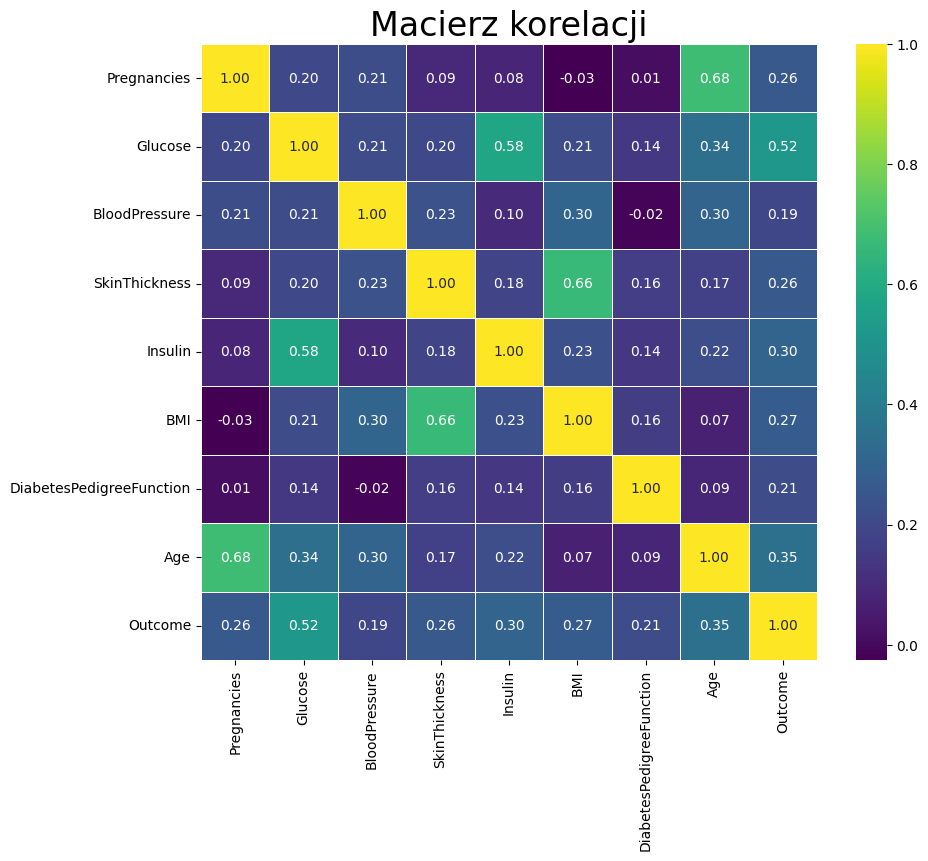

In [33]:
# dla przejrzystości stworzymy heatmape
plt.figure(figsize=(10, 8))
plt.title('Macierz korelacji', fontsize=24)
sns.heatmap(df_corr, cmap = 'viridis',  annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

### Wnioski na podstawie macierzy korelacji:
##### - występowanie cukrzycy najbardziej zależy od poziomu stężenia glukozy we krwi, a najmniej od ciśnienia krwi
##### - drugą najczęstsza przyczyną występowania cukrzycy jest wiek
##### - najwyższa korelacja dodatnia występuje między BMI, a grubością skóry
##### - BMI ma ujemną korelację (bliską 0) z ilością ciąż
### Przeprowadzimy regresję tylko dla tych zmiennych, których korelacje są najbardziej dodatnie, z wykluczeniem zmiennej binarnej 'Outcome'

In [34]:
# funkcja rysującą wykres wraz z R^2
def plot_linear_regression(x_col, y_col, df):
    X = df[[x_col]]
    y = df[y_col]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Dane')
    plt.plot(X, y_pred, color='red', label=f'Regresja liniowa\n$R^2$ = {r2:.2f}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Regresja liniowa: {y_col} vs {x_col}')
    plt.legend()
    plt.grid(True)
    plt.show()

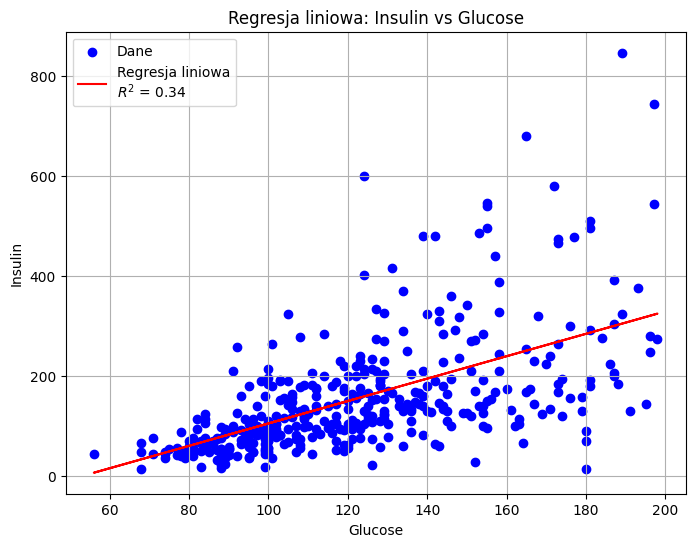

In [35]:
plot_linear_regression("Glucose", "Insulin", df)

##### Współczynnik R<sup>2</sup>  wynosi 0.34, tzn. że około 34% wariancji w wartości Insulin można wyjaśnić na podstawie zmienności wartości Glucose

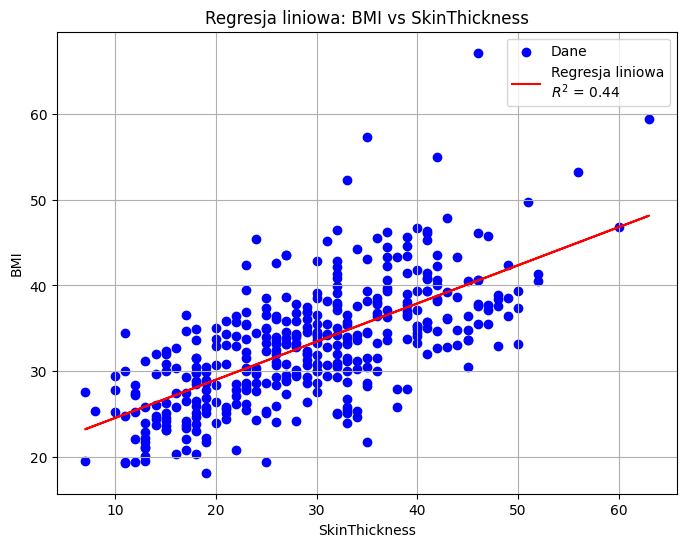

In [36]:
plot_linear_regression("SkinThickness", "BMI", df)

##### Współczynnik R<sup>2</sup> wynosi 0.44, tzn. że około 44% wariancji w wartości BMI można wyjaśnić na podstawie zmienności wartości SkinThickness

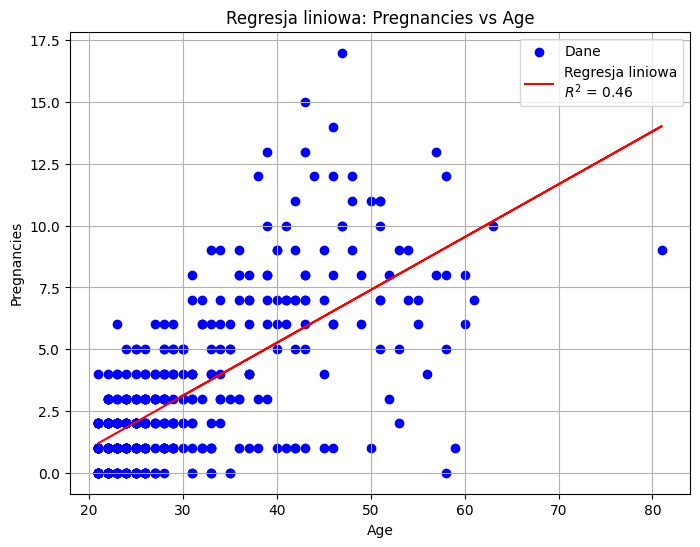

In [37]:
plot_linear_regression("Age", "Pregnancies", df)

##### Współczynnik R<sup>2</sup>  wynosi 0.46, tzn. że około 46% wariancji w wartości Pregnancies można wyjaśnić na podstawie zmienności wartości Age